##GROUP ASSIGNMENT 3
Dataset: Battery and heating data in real driving cycles

In [ ]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import glob
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from keras import utils as np_utils
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# install Optuna
!pip install --quiet optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
import optuna

optuna.__version__

'3.6.1'

Loading the dataset generated at summer.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/Grupo_Machine_Learning/MeasurementData_A/'

In [ ]:
#Caminho Guilherme
#path = '/content/drive/My Drive/Machine_Learning_UFPR/Planilhas/A3_A/'

In [ ]:
filenames = glob.glob(path + "/*.csv") #Get all csv files from the directory

In [ ]:
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding='unicode_escape', sep=';'))

In [ ]:
df1 = pd.concat(dfs, ignore_index = True)

In [ ]:
df1.head()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,min. SoC [%],max. SoC [%),Heating Power CAN [kW],Requested Heating Power [W],AirCon Power [kW],Heater Signal,Ambient Temperature [°C],Requested Coolant Temperature [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0.0,0.73,593.0,7.83,16.5,-0.11,0.0,387.0,-7.50,28.0,...,8,90.0,0.0,0.0,1.76,1,26.5,85,16.0,37.17
1,0.1,0.81,593.0,7.56,15.7,-0.09,0.0,387.0,-7.50,28.0,...,8,90.0,0.0,0.0,1.76,1,26.5,85,16.0,37.17
2,0.2,0.87,593.0,7.50,15.7,-0.07,0.0,387.0,-7.49,28.0,...,8,90.0,0.0,0.0,1.76,1,26.5,85,16.0,37.17
3,0.3,1.02,593.0,7.50,14.2,-0.06,0.0,387.0,-7.39,28.0,...,8,90.0,0.0,0.0,1.76,1,26.5,85,16.0,37.17
4,0.4,1.02,593.0,7.41,13.3,-0.05,0.0,387.0,-7.31,28.0,...,8,90.0,0.0,0.0,1.76,1,26.5,85,16.0,37.17


In [ ]:
df1.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Regenerative Braking Signal ', 'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]',
       'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]',
       'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal',
       'Ambient Temperature [°C]', 'Requested Coolant Temperature [°C]',
       'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]'],
      dtype='object')

In [ ]:
df1.shape

(272370, 23)

In [ ]:
df1 = df1.dropna(axis=0)

In [ ]:
df1.shape

(272370, 23)

Variables of interest.

In [ ]:
features = ['Velocity [km/h]', 'Throttle [%]', 'Motor Torque [Nm]',
       'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ',
       'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]',
       'SoC [%]', 'Heating Power CAN [kW]', 'Requested Heating Power [W]',
       'AirCon Power [kW]', 'Heater Signal', 'Ambient Temperature [°C]',
       'Requested Coolant Temperature [°C]', 'Heat Exchanger Temperature [°C]',
       'Cabin Temperature Sensor [°C]']
df1 = df1[features]
df1

,Velocity [km/h],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],SoC [%],Heating Power CAN [kW],Requested Heating Power [W],AirCon Power [kW],Heater Signal,Ambient Temperature [°C],Requested Coolant Temperature [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0.73,7.83,16.50,-0.11,0.0,387.0,-7.50,28.0,75.5,0.0,0.0,1.76,1,26.5,85,16.0,37.17
1,0.81,7.56,15.70,-0.09,0.0,387.0,-7.50,28.0,75.5,0.0,0.0,1.76,1,26.5,85,16.0,37.17
2,0.87,7.50,15.70,-0.07,0.0,387.0,-7.49,28.0,75.5,0.0,0.0,1.76,1,26.5,85,16.0,37.17
3,1.02,7.50,14.20,-0.06,0.0,387.0,-7.39,28.0,75.5,0.0,0.0,1.76,1,26.5,85,16.0,37.17
4,1.02,7.41,13.30,-0.05,0.0,387.0,-7.31,28.0,75.5,0.0,0.0,1.76,1,26.5,85,16.0,37.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272365,3.43,0.00,-30.50,-0.85,0.0,386.8,-2.11,27.0,75.6,0.0,0.0,0.52,1,29.0,85,5.0,29.17
272366,3.23,0.00,-29.50,-0.79,0.0,386.8,-2.14,27.0,75.6,0.0,0.0,0.52,1,29.0,85,5.0,29.17
272367,2.97,3.89,-33.00,-0.88,0.0,386.8,-2.19,27.0,75.6,0.0,0.0,0.52,1,29.0,85,5.0,29.17
272368,2.69,12.21,-28.72,-0.80,0.0,386.8,-2.31,27.0,75.6,0.0,0.0,0.52,1,29.0,85,5.0,29.17


Loading the dataset generated at winter.

In [ ]:
path = '/content/drive/My Drive/Grupo_Machine_Learning/MeasurementData_B/'

In [ ]:
#path = '/content/drive/My Drive/Machine_Learning_UFPR/Planilhas/A3_B/'

In [ ]:
filenames = glob.glob(path + "/*.csv")

In [ ]:
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding='unicode_escape', sep=';'))

In [ ]:
df2 = pd.concat(dfs, ignore_index=True)

In [ ]:
df2.head()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Temperature Footweel Driver [°C],Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C]
0,0.0,0.0,437.0,0.0,0.0,-0.34,0.0,389.9,-1.60,13.0,...,10.61,9.91,12.44,10.17,11.31,11.4,12.01,11.13,11.48,10.87
1,0.1,0.0,437.0,0.0,0.0,-0.35,0.0,389.9,-1.59,13.0,...,10.61,9.91,12.44,10.17,11.31,11.4,12.01,11.13,11.48,10.87
2,0.2,0.0,437.0,0.0,0.0,-0.37,0.0,389.9,-1.49,13.0,...,10.61,9.91,12.44,10.17,11.31,11.4,12.01,11.13,11.48,10.87
3,0.3,0.0,437.0,0.0,0.0,-0.33,0.0,389.9,-1.41,13.0,...,10.61,9.91,12.44,10.17,11.31,11.4,12.01,11.13,11.48,10.87
4,0.4,0.0,437.0,0.0,0.0,-0.30,0.0,389.9,-1.46,13.0,...,10.61,9.91,12.44,10.17,11.31,11.4,12.01,11.13,11.48,10.87


In [ ]:
df2.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Regenerative Braking Signal ', 'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]',
       'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]',
       'Heating Power LIN [W]', 'Requested Heating Power [W]',
       'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]',
       'Heater Current [A]', 'Ambient Temperature [°C]',
       'Ambient Temperature Sensor [°C]',
       'Coolant Temperature Heatercore [°C]',
       'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Coolant Volume Flow +500 [l/h]', 'Heat Exchanger Temperature [°C]',
       'Cabin Temperature Sensor [°C]',
       'Temperature Coolant Heater Inlet [°C]',
       'Temperature Coolant Heater Outlet [°C]',
       'Temperature Heat Exchanger Outle

In [ ]:
df2.shape

(521823, 48)

In [ ]:
df2 = df2.dropna(axis=0)

In [ ]:
df2.shape

(466924, 48)

In [ ]:
features = ['Velocity [km/h]', 'Throttle [%]', 'Motor Torque [Nm]',
       'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ',
       'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]',
       'SoC [%]', 'Heating Power CAN [kW]', 'Requested Heating Power [W]',
       'AirCon Power [kW]', 'Heater Signal', 'Ambient Temperature [°C]',
       'Requested Coolant Temperature [°C]', 'Heat Exchanger Temperature [°C]',
       'Cabin Temperature Sensor [°C]']
df2 = df2[features]
df2

,Velocity [km/h],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],SoC [%],Heating Power CAN [kW],Requested Heating Power [W],AirCon Power [kW],Heater Signal,Ambient Temperature [°C],Requested Coolant Temperature [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0.00,0.00,0.00,-0.34,0.0,389.90,-1.60,13.0,81.0,0.0,0.0,0.0,1,6.5,85,12.5,12.84
1,0.00,0.00,0.00,-0.35,0.0,389.90,-1.59,13.0,81.0,0.0,0.0,0.0,1,6.5,85,12.5,12.84
2,0.00,0.00,0.00,-0.37,0.0,389.90,-1.49,13.0,81.0,0.0,0.0,0.0,1,6.5,85,12.5,12.84
3,0.00,0.00,0.00,-0.33,0.0,389.90,-1.41,13.0,81.0,0.0,0.0,0.0,1,6.5,85,12.5,12.84
4,0.00,0.00,0.00,-0.30,0.0,389.90,-1.46,13.0,81.0,0.0,0.0,0.0,1,6.5,85,12.5,12.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517411,57.97,39.30,8.01,-0.08,0.0,381.90,-15.34,11.0,71.3,1.2,1240.0,0.0,1,6.0,85,48.0,19.50
517412,57.97,39.75,8.01,0.02,0.0,381.90,-16.54,11.0,71.3,1.2,1240.0,0.0,1,6.0,85,48.0,19.50
517413,57.97,40.40,8.99,0.08,0.0,381.86,-17.16,11.0,71.3,1.2,1240.0,0.0,1,6.0,85,48.0,19.50
517414,57.94,40.68,10.01,0.01,0.0,381.76,-17.06,11.0,71.3,1.2,1240.0,0.0,1,6.0,85,48.0,19.50


Concatenating both datasets.

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)
df

,Velocity [km/h],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],SoC [%],Heating Power CAN [kW],Requested Heating Power [W],AirCon Power [kW],Heater Signal,Ambient Temperature [°C],Requested Coolant Temperature [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0.73,7.83,16.50,-0.11,0.0,387.00,-7.50,28.0,75.5,0.0,0.0,1.76,1,26.5,85,16.0,37.17
1,0.81,7.56,15.70,-0.09,0.0,387.00,-7.50,28.0,75.5,0.0,0.0,1.76,1,26.5,85,16.0,37.17
2,0.87,7.50,15.70,-0.07,0.0,387.00,-7.49,28.0,75.5,0.0,0.0,1.76,1,26.5,85,16.0,37.17
3,1.02,7.50,14.20,-0.06,0.0,387.00,-7.39,28.0,75.5,0.0,0.0,1.76,1,26.5,85,16.0,37.17
4,1.02,7.41,13.30,-0.05,0.0,387.00,-7.31,28.0,75.5,0.0,0.0,1.76,1,26.5,85,16.0,37.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739289,57.97,39.30,8.01,-0.08,0.0,381.90,-15.34,11.0,71.3,1.2,1240.0,0.00,1,6.0,85,48.0,19.50
739290,57.97,39.75,8.01,0.02,0.0,381.90,-16.54,11.0,71.3,1.2,1240.0,0.00,1,6.0,85,48.0,19.50
739291,57.97,40.40,8.99,0.08,0.0,381.86,-17.16,11.0,71.3,1.2,1240.0,0.00,1,6.0,85,48.0,19.50
739292,57.94,40.68,10.01,0.01,0.0,381.76,-17.06,11.0,71.3,1.2,1240.0,0.00,1,6.0,85,48.0,19.50


Taking the average of parameters every 5 seconds.

In [ ]:
nb_row = 50
new_df = df.groupby(df.index // nb_row).mean()
new_df

,Velocity [km/h],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],SoC [%],Heating Power CAN [kW],Requested Heating Power [W],AirCon Power [kW],Heater Signal,Ambient Temperature [°C],Requested Coolant Temperature [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,1.514600,8.747000,9.303600,0.022800,0.00,387.024000,-6.8138,28.0,75.5000,0.000000,0.000000,1.6900,1.0,26.500,85.0,15.763000,37.170000
1,2.370200,17.451600,21.780800,-0.202600,0.00,386.919800,-7.8592,28.0,75.5000,0.000000,0.000000,1.6296,1.0,26.500,85.0,15.025200,37.170000
2,1.143800,5.076000,8.535400,0.045400,0.00,386.939600,-6.9030,28.0,75.5000,0.000000,0.000000,1.5704,1.0,26.725,85.0,14.263800,37.094800
3,7.629000,29.892200,30.827400,0.356400,0.00,386.588400,-11.3284,28.0,75.5000,0.000000,0.000000,1.4872,1.0,27.000,85.0,13.426000,37.010000
4,7.629600,14.794400,-22.758800,-0.508000,0.32,387.128000,-3.0634,28.0,75.4766,0.000000,0.000000,1.4572,1.0,27.123,85.0,12.625200,37.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14781,61.355600,39.231800,11.233000,-0.014800,0.00,381.112400,-19.9918,11.0,71.5000,1.200000,1270.385000,0.0000,1.0,6.000,85.0,49.796600,18.939600
14782,62.593200,38.676600,19.699000,0.116600,0.00,379.610600,-31.5162,11.0,71.4082,1.290200,1340.018400,0.0000,1.0,6.000,85.0,49.811000,19.106000
14783,58.782200,31.500400,-2.630600,-0.258800,0.00,383.637600,-1.7764,11.0,71.4000,1.281000,1300.809600,0.0000,1.0,6.000,85.0,50.000000,19.170000
14784,59.769200,43.528000,26.400800,0.208600,0.00,378.982600,-38.4088,11.0,71.3322,1.209600,1235.235200,0.0000,1.0,6.000,85.0,49.559400,19.309400


## Creating a new feature: energy consumption
This feature was created from: Battery Voltage [V] x Battery Current [A] x time.


In [ ]:
new_df['Energy_consumption'] = -0.001*new_df['Battery Voltage [V]']*new_df['Battery Current [A]']/720
new_df['Energy_consumption'].head()

0    0.003663
1    0.004223
2    0.003710
3    0.006083
4    0.001647
Name: Energy_consumption, dtype: float64

In [ ]:
new_df['Energy_consumption'].shape

(14786,)

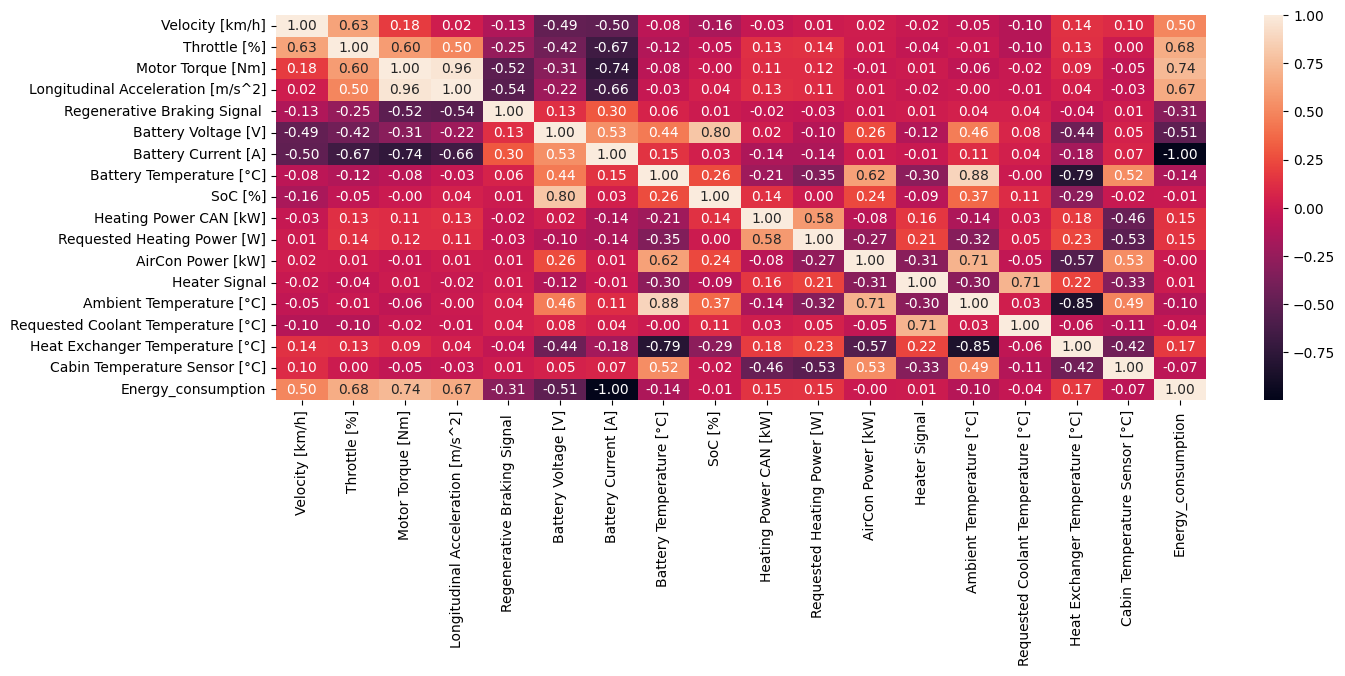

In [ ]:
# Heatmap
corr = new_df.corr()
plt.figure(figsize=(15,5))
plot = sns.heatmap(corr, annot = True, fmt = '0.2f', linewidths = 0)
#fig = plot.get_figure()

We used the heatmap to identify and remove the features that are highly correlated with each other, as they may cause redundancy. Also, we identified the features that are highly correlated with the target variable.

Motor Torque and Current Battery features were eliminated due to their high correlation with other features.

Velocity, Throttle, Longitudinal Acceleration, Rgenerative braking Signal,Battery Voltage, Heat Exchanger Temperature and Requested Heating Power features were chosen due to their medium and high correlations with the target.


In [ ]:
features = ['Velocity [km/h]', 'Throttle [%]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ',
       'Requested Heating Power [W]', 'AirCon Power [kW]', 'Energy_consumption']
new_df1 = new_df[features]

##K-Means clustering
We will explore K-Means clustering and look closely at the elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

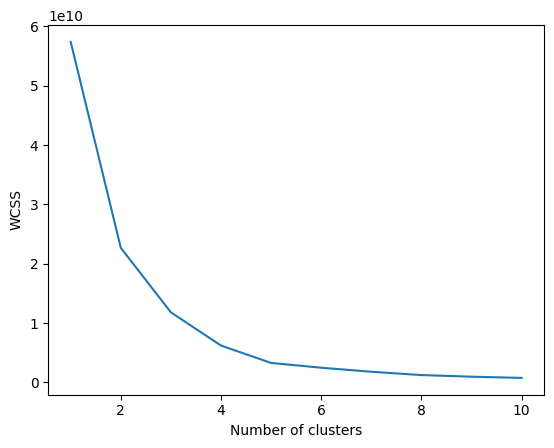

In [ ]:
#Identifying an acceptable number of clusters
wcss = []
for i in range(1, 11):
    #kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(new_df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'random', random_state = 1)
y_kmeans = kmeans.fit_predict(new_df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_kmeans

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
new_df1['cluster'] = y_kmeans

<ipython-input-35-2be250ec7aa6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['cluster'] = y_kmeans


In [ ]:
new_df1.head()

,Velocity [km/h],Throttle [%],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Requested Heating Power [W],AirCon Power [kW],Energy_consumption,cluster
0,1.5146,8.7470,0.0228,0.00,0.0,1.6900,0.003663,0
1,2.3702,17.4516,-0.2026,0.00,0.0,1.6296,0.004223,0
2,1.1438,5.0760,0.0454,0.00,0.0,1.5704,0.003710,0
3,7.6290,29.8922,0.3564,0.00,0.0,1.4872,0.006083,0
4,7.6296,14.7944,-0.5080,0.32,0.0,1.4572,0.001647,0


In [ ]:
new_df1['cluster'].value_counts()

In [ ]:
media_cluster = new_df1.groupby('cluster').mean()
display(media_cluster)

,Velocity [km/h],Throttle [%],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Requested Heating Power [W],AirCon Power [kW],Energy_consumption
cluster,,,,,,,
0,39.199889,25.431840,-0.017646,0.055739,36.875907,0.430115,0.005761
1,25.866440,23.190060,0.029441,0.044377,5534.564749,0.027559,0.013846
2,56.432113,37.779426,0.113983,0.031619,8101.413874,0.058499,0.013399
3,52.654611,29.732282,-0.006039,0.043694,1259.384560,0.004432,0.011934
4,45.825230,29.956977,0.039691,0.042317,3224.539139,0.036530,0.014628


In [ ]:
media_geral = new_df1.drop('cluster', axis=1).describe()[1:2]
display(media_geral)

,Velocity [km/h],Throttle [%],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Requested Heating Power [W],AirCon Power [kW],Energy_consumption
mean,46.221011,28.161033,-0.001433,0.04757,1374.119302,0.162441,0.010051


In [ ]:
#Defining a range for each cluster
comparativo = media_cluster.copy()
for cluster in media_cluster.index:
    for coluna in media_cluster.columns:
        if media_geral[coluna].values > media_cluster[coluna][cluster]:
            comparativo[coluna][cluster] = 'Below average'
        else:
            comparativo[coluna][cluster] = 'Above average'

display(comparativo)

<ipython-input-39-cc873e548456>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparativo[coluna][cluster] = 'Below average'
<ipython-input-39-cc873e548456>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparativo[coluna][cluster] = 'Below average'
<ipython-input-39-cc873e548456>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparativo[coluna][cluster] = 'Above average'
<ipython-input-39-cc873e548456>:5: SettingWithCopyWarni

,Velocity [km/h],Throttle [%],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Requested Heating Power [W],AirCon Power [kW],Energy_consumption
cluster,,,,,,,
0,Below average,Below average,Below average,Above average,Below average,Above average,Below average
1,Below average,Below average,Above average,Below average,Above average,Below average,Above average
2,Above average,Above average,Above average,Below average,Above average,Below average,Above average
3,Above average,Above average,Below average,Below average,Below average,Below average,Above average
4,Below average,Above average,Above average,Below average,Above average,Below average,Above average


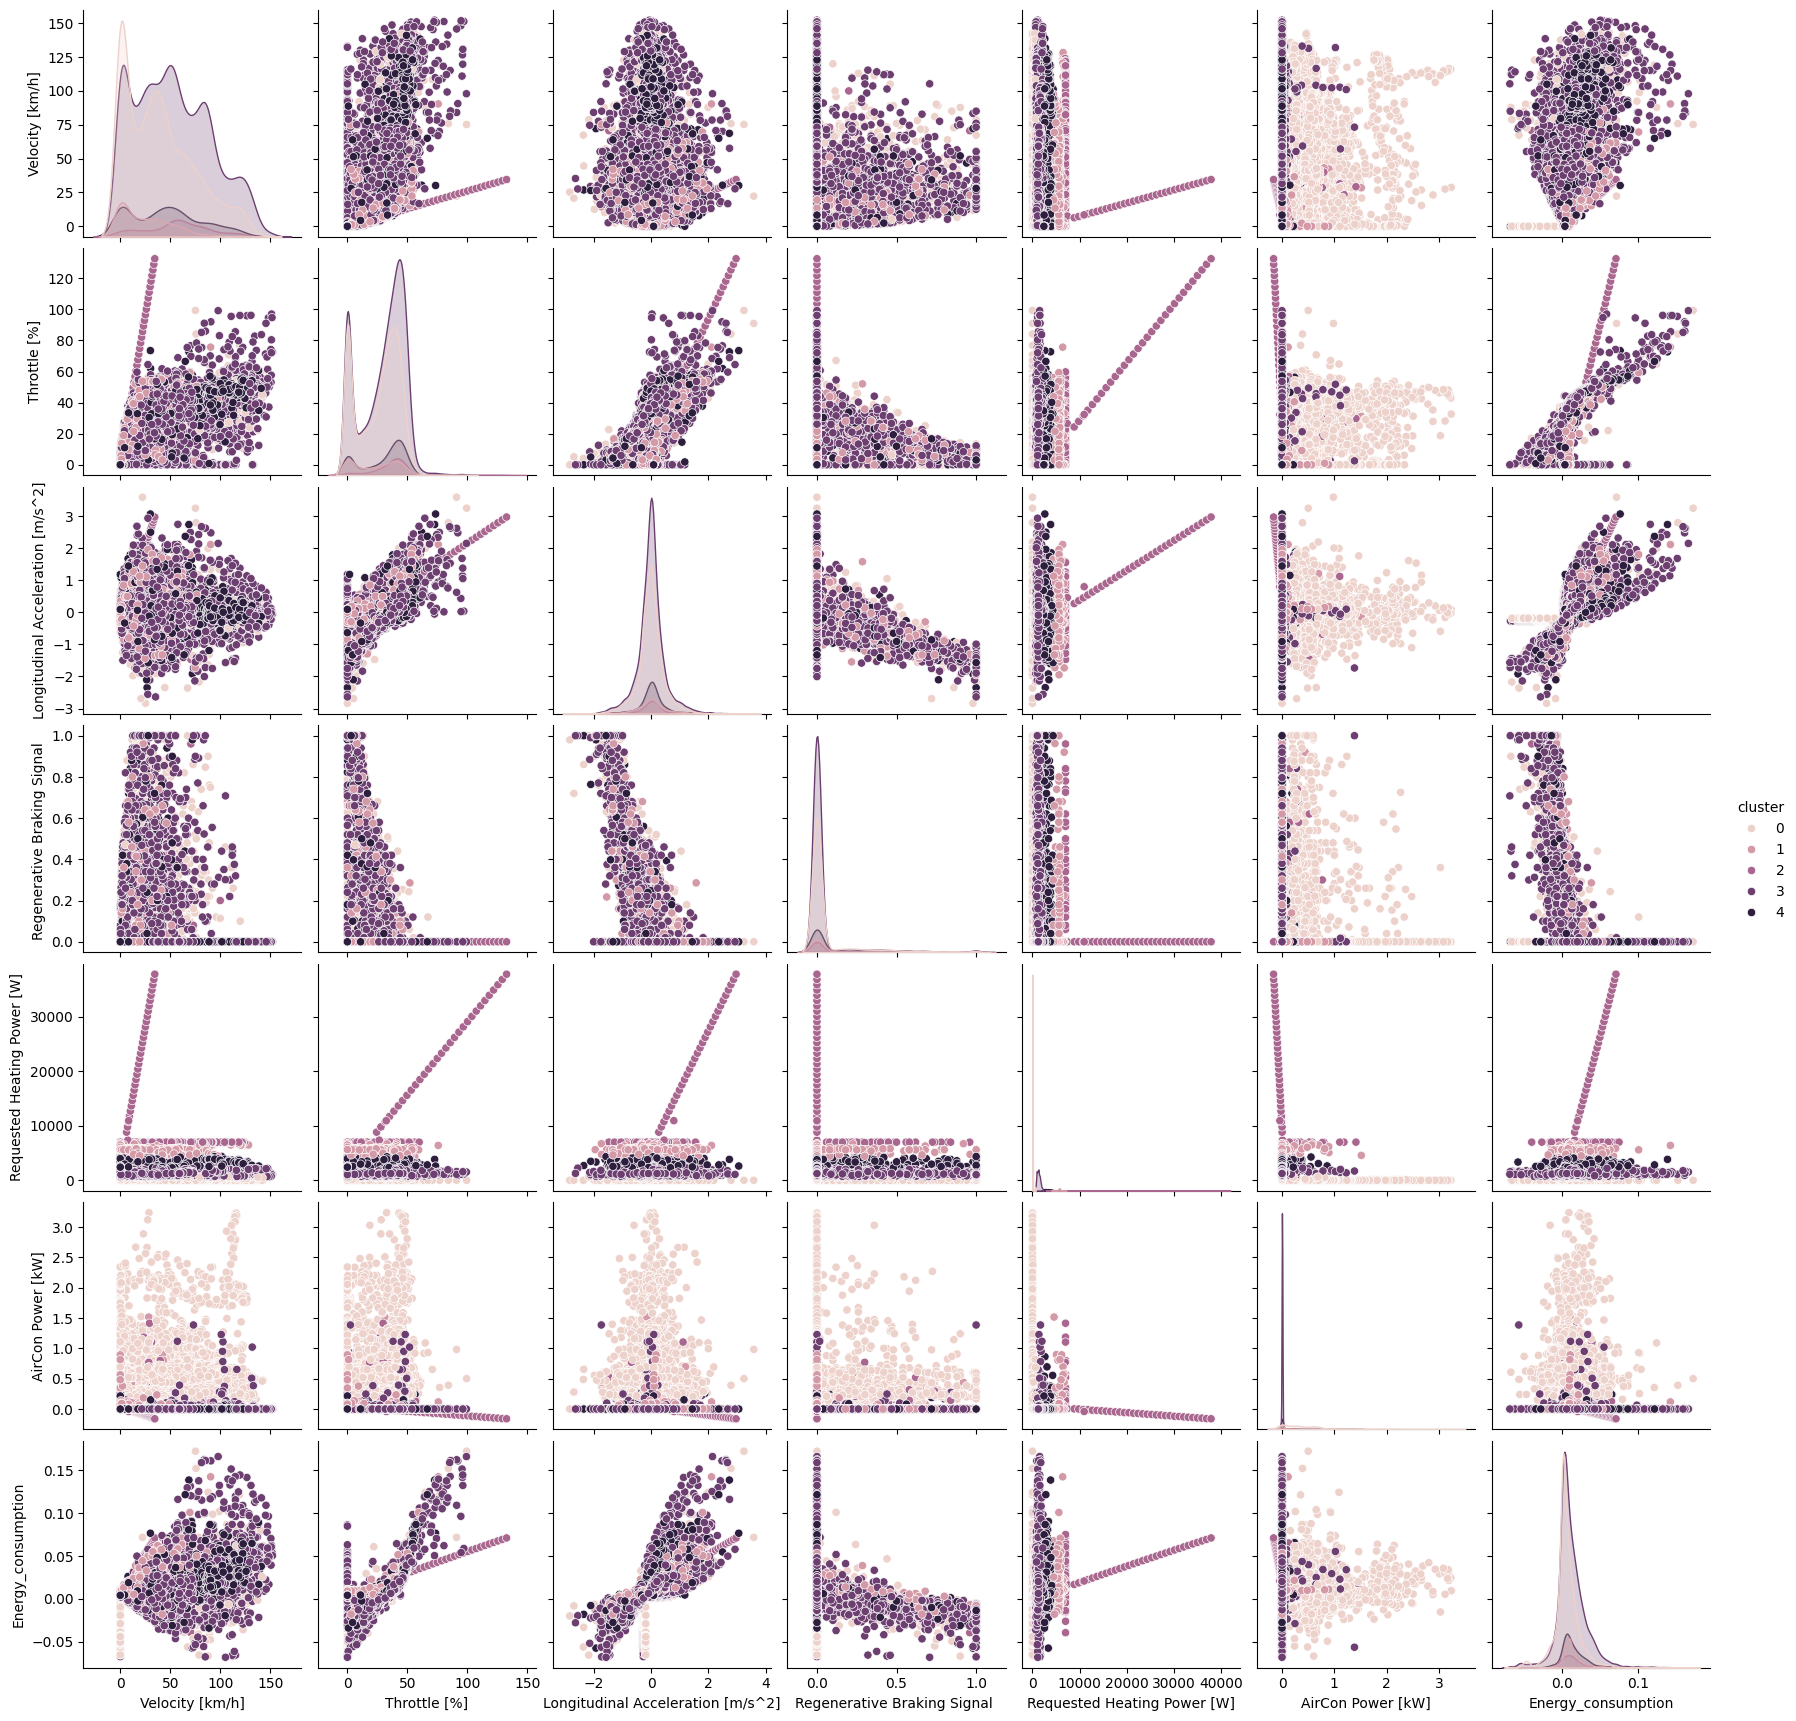

In [ ]:
sns.pairplot(new_df1, hue='cluster')
plt.show()

In [ ]:
X = new_df1[features]
y = new_df1['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

##Support Vector Machine

SVC with linear kernel.

In [ ]:
svc_linear = SVC(kernel = 'linear', random_state = 0)
svc_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = svc_linear.predict(X_test)
accuracy_score(y_test, y_pred)

0.9995491433724075

SVC with rbf kernel.

In [ ]:
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = svc_rbf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9905320108205591

SVC with Sigmoid kernel.

In [ ]:
svc_sigmoid = SVC(kernel = 'sigmoid', random_state = 0)
svc_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [ ]:
y_pred = svc_sigmoid.predict(X_test)
accuracy_score(y_test, y_pred)

0.7869702434625789

SVC with polynomial kernel.

In [ ]:
svc_poly = SVC(kernel = 'poly', degree = 3, random_state = 0)
svc_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [ ]:
y_pred = svc_poly.predict(X_test)
accuracy_score(y_test, y_pred)

0.9930117222723174

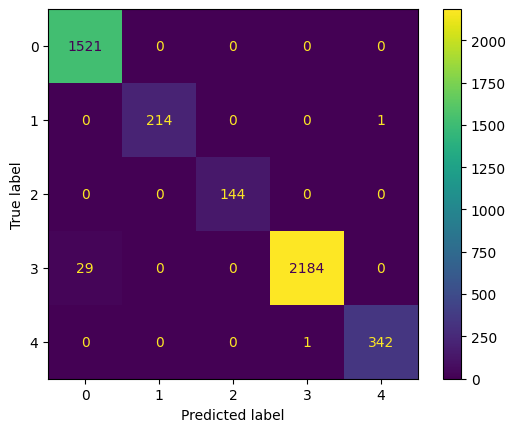

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

##K-Nearest Neighbor

Text(0.5, 1.0, 'k vs. Accuracy for KNN')

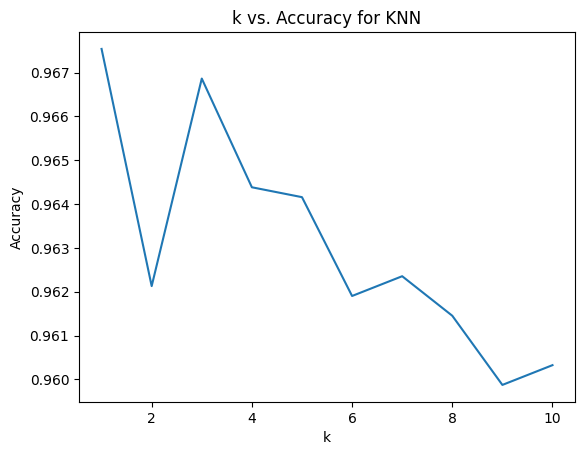

In [ ]:
accuracy = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_sc, y_train)
    accuracy.append(knn.score(X_test_sc, y_test))

plt.plot(range(1,11), accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs. Accuracy for KNN')

In [ ]:
# KNN model and evaluation for optimal value of k (1 in this case)
knn = KNeighborsClassifier(n_neighbors = accuracy.index(max(accuracy))+1).fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)
accuracy_score(y_test, y_pred)

0.9675383228133454

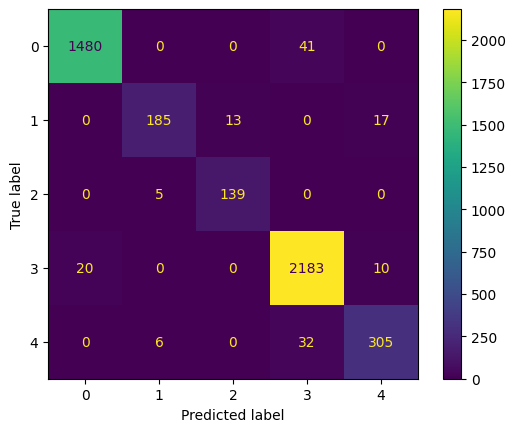

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
rf = RandomForestClassifier()

In [ ]:
params = {
'n_estimators':range(19,25),
'max_depth': range(15,25)
}
grid1 = GridSearchCV(rf, params, scoring='accuracy')
grid1.fit(X_train,y_train)
print(grid1.best_params_, grid1.best_score_)
rf_best = grid1.best_estimator_

{'max_depth': 23, 'n_estimators': 20} 0.9982608695652175


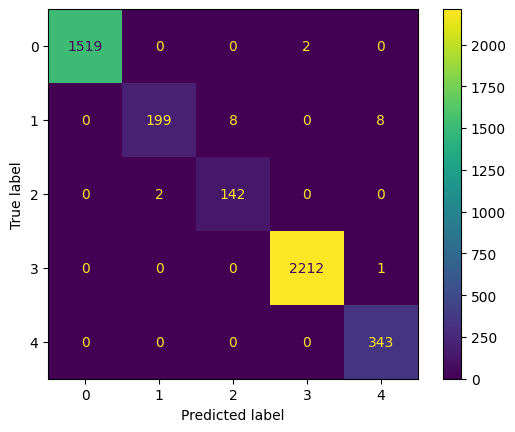

In [ ]:
y_pred = rf_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Artificial Neural Networks

In [ ]:
le = LabelEncoder()
y_ann = le.fit_transform(y)
X_train, X_test, y_train_ann, y_test_ann = train_test_split(X, y_ann, test_size=0.3, random_state=0)
y_train_cat = to_categorical(y_train_ann, 5)
y_test_cat = to_categorical(y_test_ann, 5)

Hyperparameters tuning with Optuna. Optuna will test 50 different combinations of our hyperparameters: number of hidden layers, number of neurons per layer and learning rate.

In [ ]:
def create_model(trial):
    # Some hyperparameters we want to optimize
    n_hidden = trial.suggest_int('n_hidden', 1, 3)
    n_units = trial.suggest_int('n_units', 32, 128)
    #learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(n_units, input_dim=X_train_sc.shape[1], activation='relu'))
    for i in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_units, activation='relu'))
    model.add(tf.keras.layers.Dense(y_train_cat[0].size, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy',
                  optimizer= 'adam',
                  metrics=['accuracy'])
    return model

In [ ]:
def objective(trial):
    model = create_model(trial)
    model.fit(X_train_sc, y_train_cat,
              epochs=30,
              batch_size=32,
              verbose=0)
    score = model.evaluate(X_test_sc, y_test_cat, verbose=0)[0]
    return score

In [ ]:
study = optuna.create_study()

[I 2024-05-19 22:00:32,203] A new study created in memory with name: no-name-9cf4ffb5-0bf1-49a3-8718-89f8a85aef6d


In [ ]:
study.optimize(objective, n_trials=50, show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-05-19 22:00:56,717] Trial 0 finished with value: 0.03782650828361511 and parameters: {'n_hidden': 3, 'n_units': 37}. Best is trial 0 with value: 0.03782650828361511.
[I 2024-05-19 22:01:18,675] Trial 1 finished with value: 0.02674751728773117 and parameters: {'n_hidden': 1, 'n_units': 66}. Best is trial 1 with value: 0.02674751728773117.
[I 2024-05-19 22:01:40,682] Trial 2 finished with value: 0.02094430662691593 and parameters: {'n_hidden': 1, 'n_units': 60}. Best is trial 2 with value: 0.02094430662691593.
[I 2024-05-19 22:02:02,468] Trial 3 finished with value: 0.021004648879170418 and parameters: {'n_hidden': 1, 'n_units': 45}. Best is trial 2 with value: 0.02094430662691593.
[I 2024-05-19 22:02:47,238] Trial 4 finished with value: 0.03314892575144768 and parameters: {'n_hidden': 3, 'n_units': 99}. Best is trial 2 with value: 0.02094430662691593.
[I 2024-05-19 22:03:09,654] Trial 5 finished with value: 0.025225650519132614 and parameters: {'n_hidden': 3, 'n_units': 87}. Bes

Evaluating the best ANN model.

In [ ]:
ann = Sequential()
ann.add(Dense(45, input_dim = 7, activation='relu'))
#ann.add(Dense(32, activation='relu'))
#ann.add(Dense(16, activation='relu'))
ann.add(Dense(5, activation='sigmoid'))

ann.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
ann.fit(X_train_sc,
          y_train_cat,
          epochs=30,
          validation_data=(X_test_sc,y_test_cat),
          verbose=1)

Epoch 1/30
324/324 [==============================] - 1s 3ms/step - loss: 0.8076 - accuracy: 0.7647 - val_loss: 0.4727 - val_accuracy: 0.8765
Epoch 2/30
324/324 [==============================] - 1s 2ms/step - loss: 0.3535 - accuracy: 0.9023 - val_loss: 0.2744 - val_accuracy: 0.9227
Epoch 3/30
324/324 [==============================] - 1s 2ms/step - loss: 0.2264 - accuracy: 0.9368 - val_loss: 0.1912 - val_accuracy: 0.9515
Epoch 4/30
324/324 [==============================] - 1s 3ms/step - loss: 0.1662 - accuracy: 0.9539 - val_loss: 0.1461 - val_accuracy: 0.9583
Epoch 5/30
324/324 [==============================] - 1s 3ms/step - loss: 0.1308 - accuracy: 0.9620 - val_loss: 0.1204 - val_accuracy: 0.9612
Epoch 6/30
324/324 [==============================] - 1s 4ms/step - loss: 0.1088 - accuracy: 0.9662 - val_loss: 0.1008 - val_accuracy: 0.9682
Epoch 7/30
324/324 [==============================] - 2s 5ms/step - loss: 0.0938 - accuracy: 0.9697 - val_loss: 0.0884 - val_accuracy: 0.9709
Epoch 

In [ ]:
y_pred_ann = le.inverse_transform(np.argmax(ann.predict(X_test_sc), axis=-1))

139/139 [==============================] - 0s 1ms/step


In [ ]:
accuracy_score(le.inverse_transform(y_test),y_pred_ann)

0.9876014427412083

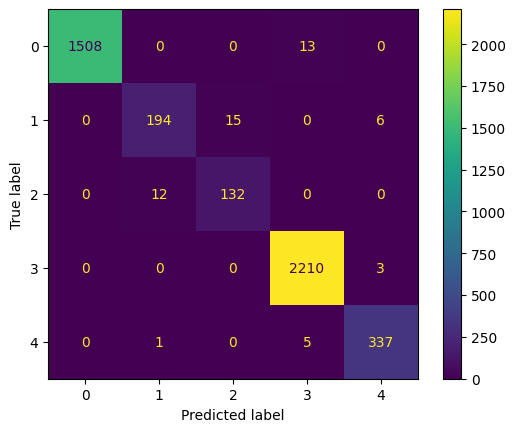

In [ ]:
cm = confusion_matrix(le.inverse_transform(y_test), y_pred_ann)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## XGBoost

In [ ]:
xg_classifier = XGBClassifier()

In [ ]:
params = {
'n_estimators':range(80,90),
'max_depth': range(5,9),
'learning_rate': [0.1,0.2,0.3]
}
grid1_xg = GridSearchCV(xg_classifier ,params, scoring='accuracy')
grid1_xg.fit(X_train_sc,y_train)
print(grid1_xg.best_params_, grid1_xg.best_score_)
xgboost_best = grid1_xg.best_estimator_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 87} 0.9954589371980676


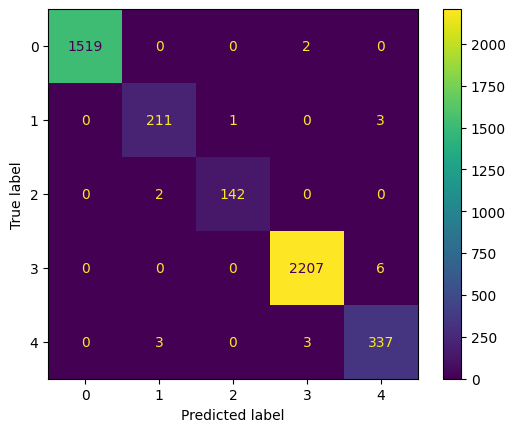

In [ ]:
y_pred = xgboost_best.predict(X_test_sc)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Cross-validation

Support Vector Machine (Linear)

In [ ]:
scores = cross_val_score(svc_linear, X_train_sc, y_train)
accuracy_svc = scores.mean()
accuracy_svc

0.9879227053140097

K-Nearest Neighbor

In [ ]:
scores = cross_val_score(knn, X_train_sc, y_train)
accuracy_knn = scores.mean()
accuracy_knn

0.9631884057971014

In [ ]:
scores = cross_val_score(rf_best, X_train, y_train)
accuracy_rf = scores.mean()
accuracy_rf

0.9971980676328502

In [ ]:
def build_fn():
    # Cria o modelo
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(45, activation='relu'))
    #model.add(tf.keras.layers.Dense(112, activation='relu'))
    #model.add(tf.keras.layers.Dense(112, activation='relu'))
    model.add(tf.keras.layers.Dense(5, activation= 'sigmoid'))
    # Compila o modelo
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn, epochs=30, batch_size=32, verbose=0)

<ipython-input-66-3238c45558f6>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn, epochs=30, batch_size=32, verbose=0)


In [ ]:
scores = cross_val_score(model, X_train_sc, le.inverse_transform(y_train_ann), scoring='accuracy')
print(scores)
accuracy_ann = scores.mean()
accuracy_ann

65/65 [==============================] - 0s 1ms/step
[0.98743961 0.99082126 0.98792271 0.98695652 0.9884058 ]


0.9883091787439613

In [ ]:
scores = cross_val_score(xgboost_best, X_train_sc, y_train)
accuracy_xg = scores.mean()
accuracy_xg

0.9954589371980676

In [ ]:
df_plotting = pd.DataFrame({
    'Model': ['SVC', 'KNN', 'Random Forest', 'ANN', 'XGBoost'],
    'Accuracy': [round(accuracy_svc,4), round(accuracy_knn, 4), round(accuracy_rf, 4), round(accuracy_ann, 4), round(accuracy_xg, 4)],
    })
df_plotting

,Model,Accuracy
0,SVC,0.9879
1,KNN,0.9632
2,Random Forest,0.9972
3,ANN,0.9883
4,XGBoost,0.9955


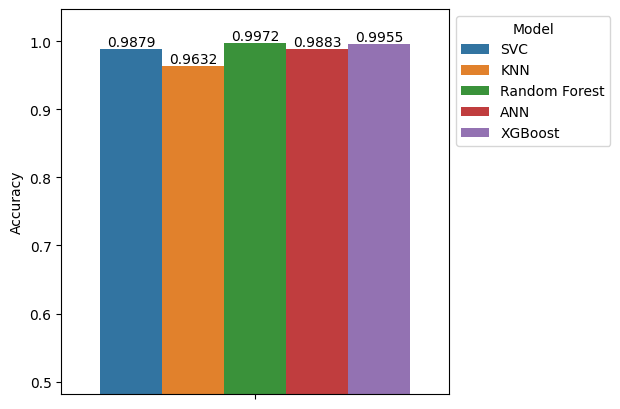

In [ ]:
plt.figure(figsize=(5,5))
accuracy_plot = sns.barplot(y=df_plotting['Accuracy'],hue=df_plotting['Model'], orient ="v")
plt.ylim(min(df_plotting['Accuracy'])* 0.5, max(df_plotting['Accuracy'])*1.05)
sns.move_legend(accuracy_plot, "upper left", bbox_to_anchor=(1, 1))
for i in accuracy_plot.containers:
    accuracy_plot.bar_label(i,)
plt.show()